In [2]:
import librosa
print(librosa.__version__)

0.6.3


In [0]:
# For audio playback
from IPython.display import Audio

In [0]:
# For waveform display
import librosa.display
import matplotlib.pyplot as plt

## Load Files

- All data are basic `numpy` types
- **Audio buffers** are called `y`
- **Sampling rate** is called `sr`
- The last axis is time-like:
        y[1000] is the 1001st sample
        S[:, 100] is the 101st frame of S
- **Defaults** `sr=22050`, `hop_length=512`
- To load a signal at its **native sampling rate**, use `sr=None`

### Load Librosa Example File

In [0]:
# get librosa's example file path
path_example_file = librosa.util.example_audio_file()

In [6]:
# load file with default sample rate 22050
y, sr = librosa.load(path_example_file)

y
# print(y)
# print('File path: ' + example_file_path)
# print('Audio buffers: ' + str(len(y)))
# print('Sampling rate: ' + str(sr))

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [7]:
# Using Ipython.display to playback the audio file
Audio(data=y, rate=sr)

Output hidden; open in https://colab.research.google.com to view.

Text(0.5, 1.0, 'sampling rate:22050')

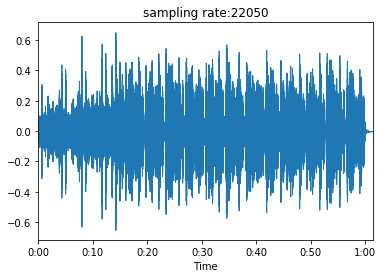

In [8]:
# display waveforms
plt.figure()
librosa.display.waveplot(y, sr)
plt.title('sampling rate:' + str(sr))

### Meaning of 'sample rate'
Sample rate is the number of audio samples that are captured per second.

In [9]:
# load the example file of 1 s duration
# We get 'y' as a numpy array
y, sr = librosa.load(path_example_file, sr=None, mono=True, duration = 1)
# To count the audio samples within that second
# We only need to find out the number of elements in the array
num_samples = y.size

print('There are %s number of samples in the audio file of 1 second.' %num_samples)
print('The sample rate of this audio file is %s' %sr)

# [TODO] double check if numpy needs to be imported or not

There are 44100 number of samples in the audio file of 1 second.
The sample rate of this audio file is 44100


### The effect of 'bit depth'
__Bit depth__, or __sample size__ is the number of 'bits' captured in each sample. 

It influences the __dynamic range__ of the signal. 



In [10]:
print(y.itemsize) # the size (in bytes) of each array element
print(y.nbytes) # the total size (in bytes) of the array

4
176400


In [0]:
# [TODO] visualise the difference in resolution

In [0]:
# [TODO] rewrite the sample file using 64-bit and 8-bit, play back and compare the difference

In [0]:
# [TODO] measure and compare dynamic range of a signal using two different bit depth

## Change Sample Rate

In [11]:
# load file with original sample rate `sr=None`
y_orig, sr_orig = librosa.load(path_example_file, sr=None, duration = 5)

# print(y_orig)
print('Sampling rate: ' + str(sr_orig))

Sampling rate: 44100


In [12]:
Audio(data=y_orig, rate=sr_orig)

Text(0.5, 1.0, 'sampling rate:44100')

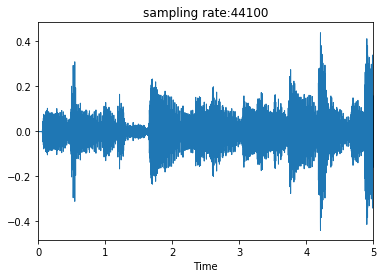

In [13]:
plt.figure()
librosa.display.waveplot(y_orig, sr_orig)
plt.title('sampling rate:' + str(sr_orig))

## Resample

In [14]:
# resample y_orig to target sample rate
sr_target = 1000
# sr_target = 11025
# sr_target = 22050
y_target = librosa.resample(y_orig, sr_orig, sr_target, duration = 5)

print('Sample rate: ' + str(sr_target))

Sample rate: 1000


In [16]:
Audio(data=y_target, rate=sr_target)

Text(0.5, 1.0, 'sampling rate:1000')

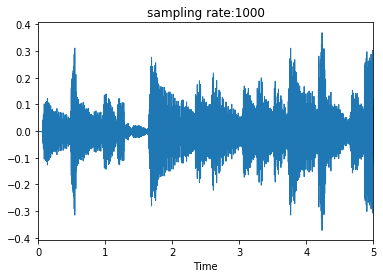

In [17]:
plt.figure()
librosa.display.waveplot(y_target, sr_target)
plt.title('sampling rate:' + str(sr_target))

## Experiment

1. Change the value of __sample rate__ of the example file and playback the resampled audio file/ array of the desired waveform.


2. Playback the audio track () & (). Try to answer:
    - What's the difference between the two?
    - How does __sample rate__ contribute to such differences?


3. Specify the duration and offset of the audio file. Display the waveforms of chosen duration and offset with the sample rate of __44.1kHz__ and __1kHz__ respectively. Compare the two waveforms using `plt.subplot`.  

[TODO] experiment on Nyquist criterion

- MP3s are delivered at 44.1 kHz, so sampling at 88.2 kHz makes the converter’s calculations relatively simple. 

- Digital broadcast uses 48 kHz, so a 96 kHz sampling rate is an obvious choice. 